# Applying Machine Learning To Loan Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv('loan.csv.zip')
loan_data.head()

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_dict = pd.read_excel('LCDataDictionary.xlsx')

In [4]:
data_dict

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
6,delinq_2yrs,The number of 30+ days past-due incidences of ...
7,desc,Loan description provided by the borrower
8,dti,A ratio calculated using the borrower’s total ...
9,dti_joint,A ratio calculated using the co-borrowers' tot...


In [5]:
data_dict[data_dict['LoanStatNew'] == 'loan_status']

,LoanStatNew,Description
32,loan_status,Current status of the loan


In [6]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [7]:
loan_data[(loan_data['loan_status'] == 'Fully Paid') | 
          (loan_data['loan_status'] == 'Late (31-120 days)') |
          (loan_data['loan_status'] == 'Late (16-30 days)') |
          (loan_data['loan_status'] == 'Charged Off')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266919 entries, 0 to 887371
Data columns (total 74 columns):
id                             266919 non-null int64
member_id                      266919 non-null int64
loan_amnt                      266919 non-null float64
funded_amnt                    266919 non-null float64
funded_amnt_inv                266919 non-null float64
term                           266919 non-null object
int_rate                       266919 non-null float64
installment                    266919 non-null float64
grade                          266919 non-null object
sub_grade                      266919 non-null object
emp_title                      252040 non-null object
emp_length                     266919 non-null object
home_ownership                 266919 non-null object
annual_inc                     266919 non-null float64
verification_status            266919 non-null object
issue_d                        266919 non-null object
loan_status          

In [8]:
loan_data_relevant = loan_data[(loan_data['loan_status'] == 'Fully Paid') | 
          (loan_data['loan_status'] == 'Late (31-120 days)') |
          (loan_data['loan_status'] == 'Late (16-30 days)') |
          (loan_data['loan_status'] == 'Charged Off')]

In [9]:
loan_data_relevant.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       14879
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           177319
purpose                             0
title                              12
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_

In [10]:
loan_data_relevant.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266919 entries, 0 to 887371
Data columns (total 43 columns):
id                         266919 non-null int64
member_id                  266919 non-null int64
loan_amnt                  266919 non-null float64
funded_amnt                266919 non-null float64
funded_amnt_inv            266919 non-null float64
term                       266919 non-null object
int_rate                   266919 non-null float64
installment                266919 non-null float64
grade                      266919 non-null object
sub_grade                  266919 non-null object
emp_length                 266919 non-null object
home_ownership             266919 non-null object
annual_inc                 266919 non-null float64
verification_status        266919 non-null object
issue_d                    266919 non-null object
loan_status                266919 non-null object
pymnt_plan                 266919 non-null object
url                        266919 n

In [11]:
loan_data_relevant = loan_data_relevant.dropna(axis=1)

## Finding Categorical Features

In [12]:
obj_loan_data = loan_data_relevant.select_dtypes(include=['object']).copy()

In [13]:
obj_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266919 entries, 0 to 887371
Data columns (total 16 columns):
term                   266919 non-null object
grade                  266919 non-null object
sub_grade              266919 non-null object
emp_length             266919 non-null object
home_ownership         266919 non-null object
verification_status    266919 non-null object
issue_d                266919 non-null object
loan_status            266919 non-null object
pymnt_plan             266919 non-null object
url                    266919 non-null object
purpose                266919 non-null object
zip_code               266919 non-null object
addr_state             266919 non-null object
earliest_cr_line       266919 non-null object
initial_list_status    266919 non-null object
application_type       266919 non-null object
dtypes: object(16)
memory usage: 34.6+ MB


In [15]:
#loan_data_relevant.drop(['next_pymnt_d', 'verification_status_joint', 'desc'], axis=1, inplace=True)

## Training XGBoost on Data Without Null Values

In [16]:
loan_data_cleaned = loan_data_relevant.dropna(axis=1)

In [17]:
X = loan_data_cleaned.drop(['loan_status'], axis=1)
y = loan_data_cleaned['loan_status']

In [18]:
from sklearn.preprocessing import LabelEncoder
for col in obj_loan_data.columns:
    if col in X.columns:
        lbl = LabelEncoder()
        X[col] = lbl.fit_transform(X[col])

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266919 entries, 0 to 887371
Data columns (total 42 columns):
id                         266919 non-null int64
member_id                  266919 non-null int64
loan_amnt                  266919 non-null float64
funded_amnt                266919 non-null float64
funded_amnt_inv            266919 non-null float64
term                       266919 non-null int64
int_rate                   266919 non-null float64
installment                266919 non-null float64
grade                      266919 non-null int64
sub_grade                  266919 non-null int64
emp_length                 266919 non-null int64
home_ownership             266919 non-null int64
annual_inc                 266919 non-null float64
verification_status        266919 non-null int64
issue_d                    266919 non-null int64
pymnt_plan                 266919 non-null int64
url                        266919 non-null int64
purpose                    266919 non-null i

In [20]:
y

0                 Fully Paid
1                Charged Off
2                 Fully Paid
3                 Fully Paid
5                 Fully Paid
7                 Fully Paid
8                Charged Off
9                Charged Off
10                Fully Paid
11                Fully Paid
12               Charged Off
13                Fully Paid
14               Charged Off
15                Fully Paid
16                Fully Paid
17                Fully Paid
18                Fully Paid
19                Fully Paid
20                Fully Paid
21               Charged Off
22                Fully Paid
23                Fully Paid
24               Charged Off
25                Fully Paid
26               Charged Off
27               Charged Off
28                Fully Paid
29                Fully Paid
30                Fully Paid
31                Fully Paid
                 ...        
887198            Fully Paid
887202            Fully Paid
887215            Fully Paid
887231    Late

In [21]:
from xgboost import XGBClassifier

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
xgb_model = XGBClassifier(nthread=6)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=6,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [25]:
from sklearn.metrics import classification_report
pred = xgb_model.predict(X_test)
print(classification_report(pred, y_test))

                    precision    recall  f1-score   support

       Charged Off       0.98      1.00      0.99     13297
        Fully Paid       1.00      1.00      1.00     62570
 Late (16-30 days)       0.03      0.68      0.06        31
Late (31-120 days)       1.00      0.84      0.91      4178

       avg / total       1.00      0.99      0.99     80076



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(n_estimators=150, n_jobs=8)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=8, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
pred = rfc.predict(X_test)
print(classification_report(pred, y_test))

                    precision    recall  f1-score   support

       Charged Off       0.99      1.00      0.99     13432
        Fully Paid       1.00      1.00      1.00     62436
 Late (16-30 days)       0.06      0.69      0.11        58
Late (31-120 days)       0.99      0.85      0.91      4150

       avg / total       1.00      0.99      0.99     80076



In [31]:
rfc.feature_importances_

array([  1.80391552e-02,   1.82211196e-02,   3.85041452e-02,
         3.43253651e-02,   3.67897580e-02,   4.98396954e-03,
         7.06775230e-03,   3.03700319e-02,   3.73214385e-03,
         4.49824657e-03,   1.27398714e-03,   4.76255246e-04,
         2.38538082e-03,   8.22275884e-04,   1.57667158e-03,
         4.99432278e-06,   3.93422450e-03,   1.01650143e-03,
         2.22605996e-03,   1.64453252e-03,   3.19733666e-03,
         6.06181275e-04,   2.22757229e-03,   7.46574666e-04,
         1.67790288e-03,   4.21701458e-04,   2.85544201e-03,
         1.92314197e-03,   1.37398857e-03,   8.54148651e-02,
         8.05078428e-02,   6.44004899e-02,   5.11711660e-02,
         1.49648899e-01,   1.32087496e-02,   4.17744894e-03,
         1.14281394e-01,   1.06922998e-01,   1.03296229e-01,
         0.00000000e+00,   0.00000000e+00,   4.75063797e-05])

In [33]:
feature_importance_dict = dict(zip(X.columns, rfc.feature_importances_))

In [36]:
max(feature_importance_dict, key=feature_importance_dict.get)

'total_rec_prncp'

In [37]:
data_dict[data_dict['LoanStatNew'] == 'total_rec_prncp']

,LoanStatNew,Description
56,total_rec_prncp,Principal received to date


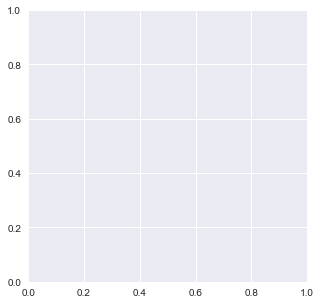

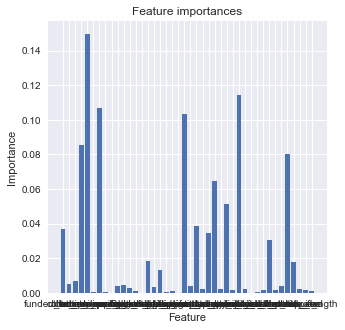

In [35]:
plt.figure(figsize=(5,5))
plt.bar(range(len(feature_importance_dict)), feature_importance_dict.values(), align='center')
plt.xticks(range(len(feature_importance_dict)), list(feature_importance_dict.keys()))
plt.title('Feature importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()